In [1]:
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu118
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps "xformers<0.0.27" "trl<0.9.0" peft accelerate bitsandbytes

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.6/839.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from unsloth import FastLanguageModel
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "lesterds10/les_llama3.1_model", # YOUR MODEL YOU USED FOR TRAINING
    max_seq_length = 2048,
    dtype = None,
    load_in_4bit = True,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.8: Fast Llama patching. Transformers = 4.44.0.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.3.0+cu118. CUDA = 8.0. CUDA Toolkit = 11.8.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.26.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Unsloth 2024.8 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [3]:
FastLanguageModel.for_inference(model)

In [ ]:
# alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

# ### Instruction:
# {}

# ### Input:
# {}

# ### Response:
# {}"""

In [ ]:
# input = alpaca_prompt.format(
#         "Given the following market data. Return strictly a single word as prediction value which is 'bullish' if the market is absolutely 'bullish' or 'bearish' if the market is absolutely 'bearish'.", # instruction
#         "Lag1_ClosePrice: 1178.3, Lag3_ClosePrice: 1178.3, 7-day SMA: 1079.585714285706, 30-day SMA: 1164.3833333333318, Volatility: 137.2730781694158, RSI: 0.0, MACD: -64.22059040522322, MACD Signal: -21.022222120056497, Sentiment Rolling: -1.0.", # input
#         "", # output - leave this blank for generation!
#     )

In [ ]:
# output = model.generate(
#     **tokenizer(input, return_tensors = "pt").to("cuda"), max_new_tokens = 64, use_cache = True
# )

In [ ]:
# tokenizer.batch_decode(output)

["<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nBelow is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Input:\nGiven the following market data. Return strictly a single word as prediction value which is 'bullish' if the market is absolutely 'bullish' or 'bearish' if the market is absolutely 'bearish'.\n\n### Response:\nbearish<|end_of_text|>"]

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
import pandas as pd

test_df = pd.read_csv('/content/drive/MyDrive/Thesis Folder/Test_Xydataset.csv')

In [6]:
test_df

,Prompt,Target
0,"Lag1_ClosePrice: 5377.15, Lag3_ClosePrice: 537...",bearish
1,"Lag1_ClosePrice: 1204.25, Lag3_ClosePrice: 120...",bearish
2,"Lag1_ClosePrice: 2771.25, Lag3_ClosePrice: 277...",bearish
3,"Lag1_ClosePrice: 284.1, Lag3_ClosePrice: 284.1...",bearish
4,"Lag1_ClosePrice: 1798.35, Lag3_ClosePrice: 343...",bearish
...,...,...
91806,"Lag1_ClosePrice: 1165.25, Lag3_ClosePrice: 116...",bearish
91807,"Lag1_ClosePrice: 3320.3, Lag3_ClosePrice: 3320...",bearish
91808,"Lag1_ClosePrice: 3001.35, Lag3_ClosePrice: 300...",bearish
91809,"Lag1_ClosePrice: 1141.35, Lag3_ClosePrice: 907...",bearish


In [7]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given the following market data. Return strictly a single word as prediction value which is 'bullish' if the market is absolutely 'bullish' or 'bearish' if the market is absolutely 'bearish'.", # instruction

### Input:
{}

### Response:
"""

In [8]:
def collate_fn(prompt):
  text = []
  ip = [alpaca_prompt.format(p['Prompt']) for p in prompt]
  # inputs = tokenizer(ip, return_tensors='pt')
  inputs = tokenizer(ip, return_tensors='pt', padding=True, truncation=True, max_length=2048)
  return {'input_ids': inputs['input_ids'],
          'attention_mask': inputs['attention_mask']}

In [9]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from datasets import load_dataset

test_data = load_dataset('csv', data_files='/content/drive/MyDrive/Thesis Folder/Test_Xydataset.csv', split='train')
# # Sub-sample to take only 5000 records
# subsampled_test_data = test_data.shuffle(seed=42).select(range(5000))
test_data_loader = DataLoader(test_data, batch_size=16, collate_fn=collate_fn, pin_memory=True, num_workers=4)


Generating train split: 0 examples [00:00, ? examples/s]

In [10]:
!nvidia-smi

Tue Aug 13 08:30:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0              48W / 400W |   6627MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [11]:
len(test_data_loader)

5739

In [12]:
import torch
import numpy as np
import pandas as pd
import gc
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Ensure the model is in evaluation mode
model.eval()
predictions = []
for batch in tqdm(test_data_loader, desc="Processing batches"):
    input_ids = batch['input_ids'].to("cuda")
    attention_mask = batch['attention_mask'].to("cuda")
    # op = model.generate(input=input_ids, attention_mask=attention_mask, max_length=64, use_cache=True)
    op = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=64, use_cache=True)
    decoded_op = tokenizer.batch_decode(op, skip_special_tokens=True)
    predictions.extend(decoded_op)
    del input_ids, attention_mask, op
    torch.cuda.empty_cache()
    gc.collect()

    # decoded = tokenizer.decode(logits.argmax(dim=-1))
    # print(decoded)
    # break



Processing batches:   0%|          | 0/5739 [00:00<?, ?it/s]

In [13]:
# Optionally: Compare predictions to targets and compute accuracy, etc.
predictions

['Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nGiven the following market data. Return strictly a single word as prediction value which is \'bullish\' if the market is absolutely \'bullish\' or \'bearish\' if the market is absolutely \'bearish\'.", # instruction\n\n### Input:\nLag1_ClosePrice: 5377.15, Lag3_ClosePrice: 5377.15, 7-day SMA: 5377.15, 30-day SMA: 6140.759999999998, Volatility: 590.952776778849, RSI: 0.0, MACD: -327.2757601859312, MACD Signal: -287.1874106737844, Sentiment Rolling: 0.0.\n\n### Response:\nbullish',
 'Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nGiven the following market data. Return strictly a single word as prediction value which is \'bullish\' if the market is absolutely \'bullish\' or \'bear

In [14]:
# Extract the prediction word from each generated text
extracted_predictions = []
for pred in predictions:
    # Split the prediction text to find the response part
    if "### Response:" in pred:
        # Extract everything after "### Response:"
        response = pred.split("### Response:")[1].strip()
        # Strip any unwanted whitespace and newline characters
        # response = response.split()[0]  # This should give us the first word after "### Response:"
        extracted_predictions.append(response)
    else:
        extracted_predictions.append("")  # Fallback in case the structure is different

# Replace the old predictions with the extracted ones
test_df['Llama 3.1 Predictions'] = extracted_predictions

In [15]:
test_df['Llama 3.1 Predictions']

,Llama 3.1 Predictions
0,bullish
1,bullish
2,bearish
3,bearish
4,bullish
...,...
91806,bullish
91807,bearish
91808,bullish
91809,bullish


In [16]:
test_df['Llama 3.1 Predictions'].value_counts()

,count
Llama 3.1 Predictions,
bullish,55166
bearish,36645


In [17]:
test_df['Target'].value_counts()

,count
Target,
bearish,87607
bullish,4204


In [18]:
test_df

,Prompt,Target,Llama 3.1 Predictions
0,"Lag1_ClosePrice: 5377.15, Lag3_ClosePrice: 537...",bearish,bullish
1,"Lag1_ClosePrice: 1204.25, Lag3_ClosePrice: 120...",bearish,bullish
2,"Lag1_ClosePrice: 2771.25, Lag3_ClosePrice: 277...",bearish,bearish
3,"Lag1_ClosePrice: 284.1, Lag3_ClosePrice: 284.1...",bearish,bearish
4,"Lag1_ClosePrice: 1798.35, Lag3_ClosePrice: 343...",bearish,bullish
...,...,...,...
91806,"Lag1_ClosePrice: 1165.25, Lag3_ClosePrice: 116...",bearish,bullish
91807,"Lag1_ClosePrice: 3320.3, Lag3_ClosePrice: 3320...",bearish,bearish
91808,"Lag1_ClosePrice: 3001.35, Lag3_ClosePrice: 300...",bearish,bullish
91809,"Lag1_ClosePrice: 1141.35, Lag3_ClosePrice: 907...",bearish,bullish


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(test_df['Target'], test_df['Llama 3.1 Predictions'])
# Set pos_label to one of your string labels
precision = precision_score(test_df['Target'], test_df['Llama 3.1 Predictions'], pos_label='bullish')
recall = recall_score(test_df['Target'], test_df['Llama 3.1 Predictions'], pos_label='bullish')
f1 = f1_score(test_df['Target'], test_df['Llama 3.1 Predictions'], pos_label='bullish')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.40606245438999683
Precision: 0.0439
Recall: 0.5756
F1 Score: 0.0815


In [21]:
report = classification_report(test_df['Target'], test_df['Llama 3.1 Predictions'])
print(report)

              precision    recall  f1-score   support

     bearish       0.95      0.40      0.56     87607
     bullish       0.04      0.58      0.08      4204

    accuracy                           0.41     91811
   macro avg       0.50      0.49      0.32     91811
weighted avg       0.91      0.41      0.54     91811



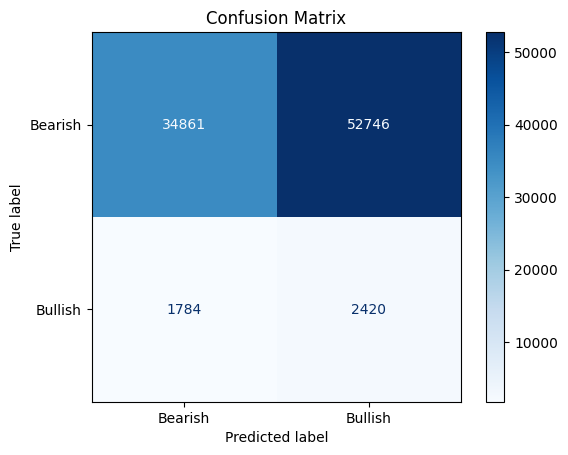

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(test_df['Target'], test_df['Llama 3.1 Predictions'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bearish', 'Bullish'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

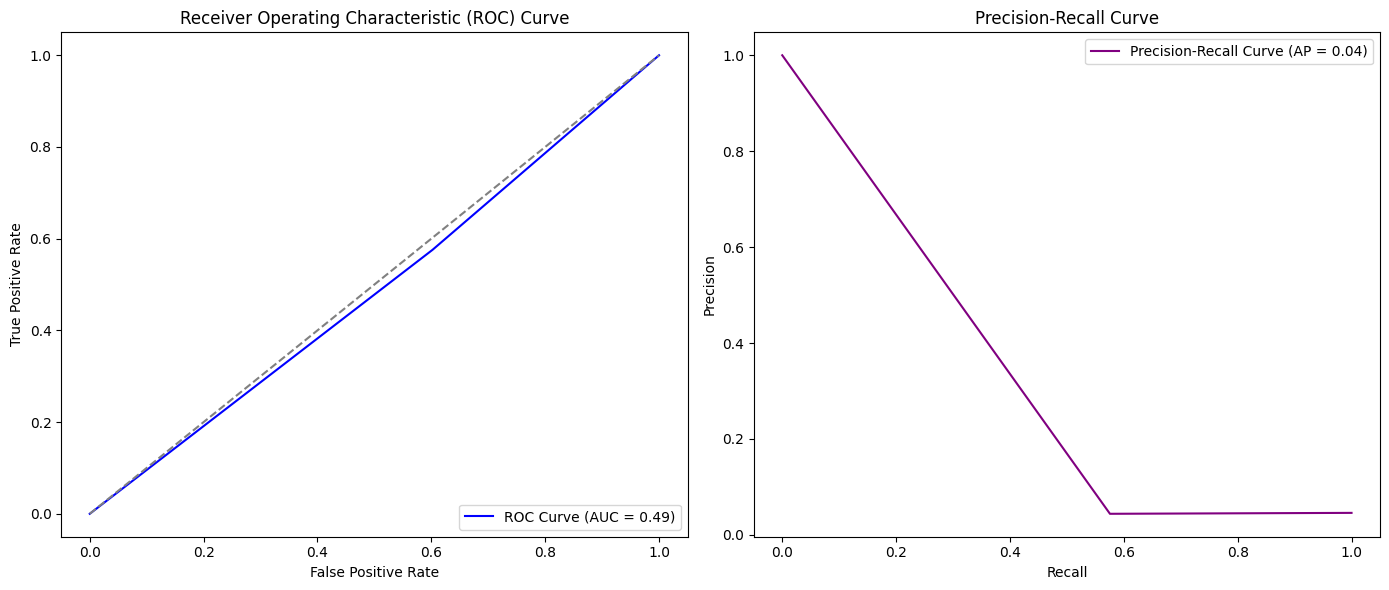

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Assuming filtered_y_test and filtered_X_test are pre-defined and available

# Map 'bearish' to 0 and 'bullish' to 1
label_mapping = {'bearish': 0, 'bullish': 1}
y_true = test_df['Target'].map(label_mapping)
y_pred = test_df['Llama 3.1 Predictions'].map(label_mapping)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred)

# Calculate AUC
auc_score = roc_auc_score(y_true, y_pred)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred)

# Calculate average precision score
avg_precision = average_precision_score(y_true, y_pred)

# Plot ROC curve and Precision-Recall curve side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot ROC curve
ax1.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
ax1.plot([0, 1], [0, 1], color='grey', linestyle='--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver Operating Characteristic (ROC) Curve')
ax1.legend(loc="lower right")

# Plot Precision-Recall curve
ax2.plot(recall, precision, color='purple', label=f'Precision-Recall Curve (AP = {avg_precision:.2f})')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [ ]:
# Assuming test_df is your DataFrame

# Calculate the counts for actual (Target) sentiments
actual_bullish_count = (test_df['Target'] == 'bullish').sum()
actual_bearish_count = (test_df['Target'] == 'bearish').sum()

# Determine the overall sentiment based on actual values
if actual_bullish_count > actual_bearish_count:
    actual_overall_sentiment = 'bullish'
elif actual_bearish_count > actual_bullish_count:
    actual_overall_sentiment = 'bearish'
else:
    actual_overall_sentiment = 'neutral'  # If there's a tie

# Calculate the counts for predicted (Llama 3.1 Predictions) sentiments
predicted_bullish_count = (test_df['Llama 3.1 Predictions'] == 'bullish').sum()
predicted_bearish_count = (test_df['Llama 3.1 Predictions'] == 'bearish').sum()

# Determine the overall sentiment based on predicted values
if predicted_bullish_count > predicted_bearish_count:
    predicted_overall_sentiment = 'bullish'
elif predicted_bearish_count > predicted_bullish_count:
    predicted_overall_sentiment = 'bearish'
else:
    predicted_overall_sentiment = 'neutral'  # If there's a tie

# Print the results for actual values
print("LLaMA 3.1 model")
print("Overall Sentiment for NIFTY 50 Based on Actual Values:")
print(f"Overall Sentiment: {actual_overall_sentiment}")
print(f"Bullish Count: {actual_bullish_count}")
print(f"Bearish Count: {actual_bearish_count}")

# Print the results for predicted values
print("\nOverall Sentiment for NIFTY 50 Based on Predicted Values:")
print(f"Overall Sentiment: {predicted_overall_sentiment}")
print(f"Bullish Count: {predicted_bullish_count}")
print(f"Bearish Count: {predicted_bearish_count}")